# 《人工神经网络理论、设计及应用》代码实践-第九章 支持向量机
<hr>

### 9.3 支持向量机的学习算法

#### 书中代码-Page201 基于python的SVM

In [1]:
# Page201 基于python的SVM

import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

# 导入训练数据
X = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
Y = np.array([0, 0, 1, 1])

# 设置参数
#clf = svm.SVC(kernel='poly', degree=2, gamma=1, coef0=0)
clf = svm.SVC(kernel='poly', degree=2, C=1.0)
#clf = svm.SVC(kernel='rbf', degree=2, gamma=1, coef0=0)
clf.fit(X, Y)
out = clf.predict(X)
print("out:\n", out)

# 进行预测
new_sample = [[2., 2.]]
clf.predict(new_sample)

# 获取支持向量的各种属性值
# 获得支持向量
clf.support_vectors_
# 获得支持向量的编号
clf.support_
# 获得每一类的支持向量
clf.n_support_
print("Support vectors:\n", clf.support_vectors_)
print("Indices of support vectors:\n", clf.support_)
print("Number of support vectors for each class:\n", clf.n_support_)

out:
 [0 0 1 1]
Support vectors:
 [[0. 0.]
 [1. 1.]
 [0. 1.]
 [1. 0.]]
Indices of support vectors:
 [0 1 2 3]
Number of support vectors for each class:
 [2 2]


### 9.5 支持向量机处理XOR问题

#### Page203 9.5 SVM网络解决XOR问题

Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Expected Output:
[0 1 1 0]
Actual Output:
[0 1 1 0]


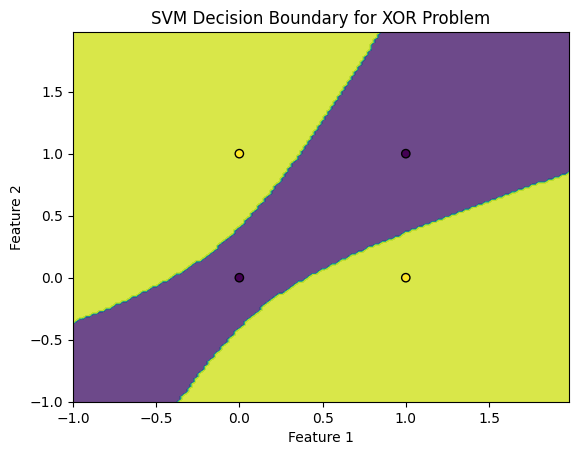

In [2]:
# sklearn包中SVM解决XOR问题（使用POLY核函数）

import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# XOR problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

# Create a non-linear SVM classifier with a polynomial kernel of degree 2
svm_classifier = SVC(kernel='poly', degree=2, C=1.0)

# Fit the model to the data
svm_classifier.fit(X, Y)

# Predict results
Y_pred = svm_classifier.predict(X)

# Print input, expected output, and actual output
print("Input:")
print(X)
print("Expected Output:")
print(Y)
print("Actual Output:")
print(Y_pred)

# Plotting the decision boundary and the data points
def plot_decision_boundary(model, X, Y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary for XOR Problem')
    plt.show()

plot_decision_boundary(svm_classifier, X, Y)

#### 延展-SVM解决XOR问题（使用RBF核函数）

Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Expected Output:
[0 1 1 0]
Actual Output:
[0 1 1 0]


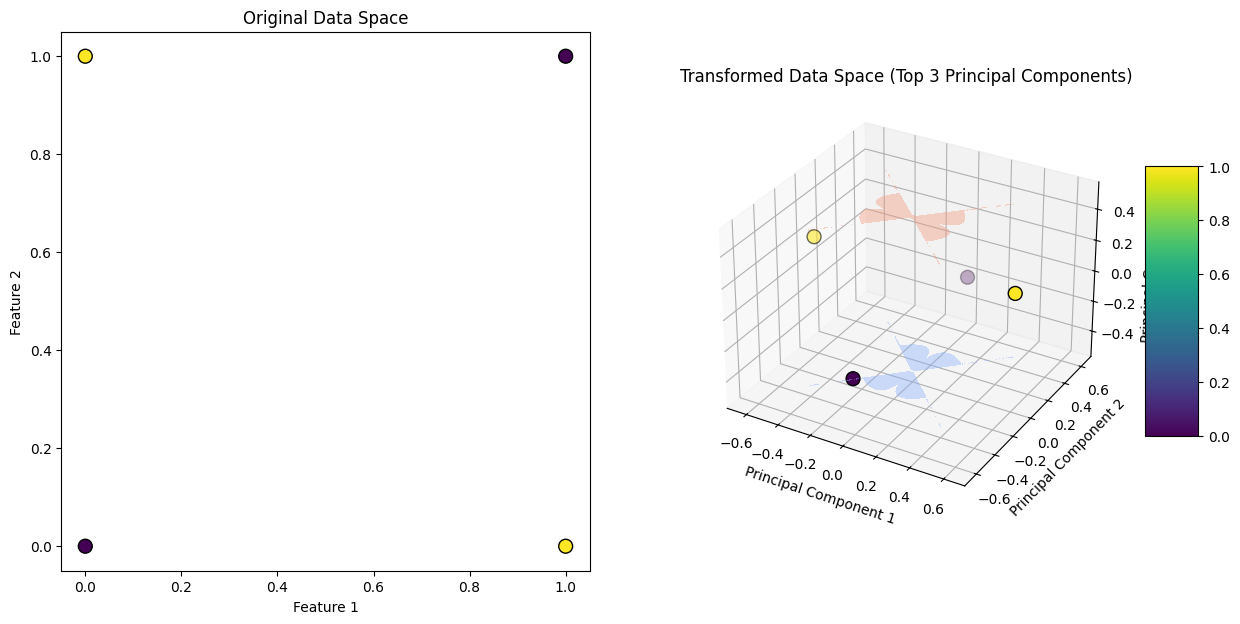

In [3]:
# sklearn包中SVM解决XOR问题（使用RBF核函数）

import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# XOR problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

# Create a non-linear SVM classifier with an RBF kernel
svm_classifier = SVC(kernel='rbf', gamma=1.0)

# Fit the model to the data
svm_classifier.fit(X, Y)

# Predict results
Y_pred = svm_classifier.predict(X)

# Print input, expected output, and actual output
print("Input:")
print(X)
print("Expected Output:")
print(Y)
print("Actual Output:")
print(Y_pred)

# Define RBF kernel function
def rbf_kernel(x1, x2, gamma):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

# Compute the RBF kernel matrix
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf_kernel(X[i], X[j], gamma=1.0)

# Use PCA to reduce the dimensionality of the feature space to 3D
pca = PCA(n_components=3)
X_transformed = pca.fit_transform(K)

# Function to plot decision boundary in 3D
def plot_decision_boundary_3d(model, X, Y, X_transformed):
    fig = plt.figure(figsize=(15, 7))

    # Original Data Space
    ax1 = fig.add_subplot(121)
    ax1.set_title('Original Data Space')
    ax1.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolors='k', s=100)
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')

    # Transformed Data Space (3D)
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.set_title('Transformed Data Space (Top 3 Principal Components)')
    scatter = ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=Y, cmap='viridis', edgecolors='k', s=100)
    ax2.set_xlabel('Principal Component 1')
    ax2.set_ylabel('Principal Component 2')
    ax2.set_zlabel('Principal Component 3')

    # Generate grid points for decision boundary
    xx, yy = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T

    # Compute RBF kernel matrix for grid points
    K_grid = np.zeros((xy.shape[0], n_samples))
    for i in range(xy.shape[0]):
        for j in range(n_samples):
            K_grid[i, j] = rbf_kernel(xy[i], X[j], gamma=1.0)

    # Transform grid points using PCA
    xy_transformed = pca.transform(K_grid)

    # Predict class labels for grid points
    Z = model.decision_function(xy).reshape(xx.shape)

    # Plot decision boundary in 3D
    contour = ax2.contourf(xy_transformed[:, 0].reshape(xx.shape),
                           xy_transformed[:, 1].reshape(xx.shape),
                           xy_transformed[:, 2].reshape(xx.shape),
                           Z,
                           levels=[-1, 0, 1],
                           alpha=0.4,
                           cmap=plt.cm.coolwarm)

    plt.colorbar(scatter, ax=ax2, shrink=0.5, aspect=5)
    plt.show()

plot_decision_boundary_3d(svm_classifier, X, Y, X_transformed)



